<a href="https://colab.research.google.com/github/Vijay-Akshar/Data-Science-Projects/blob/main/BinaryClassificationMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 52% 85.0M/163M [00:00<00:00, 885MB/s]
100% 163M/163M [00:00<00:00, 734MB/s] 


In [4]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

#I just wanted to see what we're working with

['with_mask_2265.jpg', 'with_mask_2764.jpg', 'with_mask_222.jpg', 'with_mask_1164.jpg', 'with_mask_2863.jpg']
['with_mask_1740.jpg', 'with_mask_769.jpg', 'with_mask_436.jpg', 'with_mask_3177.jpg', 'with_mask_1636.jpg']
['without_mask_3471.jpg', 'without_mask_2880.jpg', 'without_mask_3422.jpg', 'without_mask_632.jpg', 'without_mask_766.jpg']
['without_mask_1508.jpg', 'without_mask_535.jpg', 'without_mask_3462.jpg', 'without_mask_3340.jpg', 'without_mask_3162.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [8]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [9]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


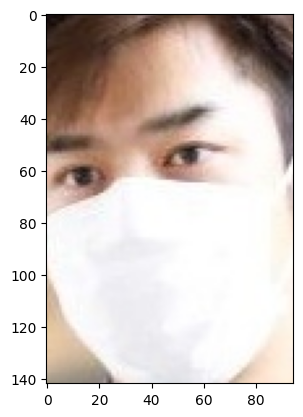

In [10]:
img = mpimg.imread('/content/data/with_mask/with_mask_436.jpg')
imgplot = plt.imshow(img)
plt.show()

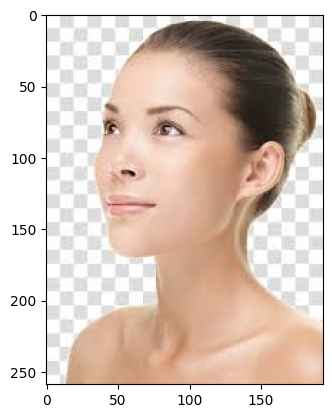

In [11]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
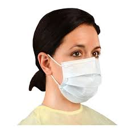

In [14]:
data[0]

In [15]:
X = np.array(data)
print(X.shape)
Y = np.array(labels)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [18]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [19]:
X_train_scaled[0]

array([[[1.        , 0.88235294, 0.82745098],
        [0.80392157, 0.66666667, 0.61176471],
        [0.67843137, 0.54509804, 0.49411765],
        ...,
        [0.38039216, 0.24705882, 0.24313725],
        [0.38823529, 0.25490196, 0.25098039],
        [0.40784314, 0.2745098 , 0.27058824]],

       [[0.96862745, 0.82745098, 0.77254902],
        [0.81960784, 0.6745098 , 0.61960784],
        [0.68627451, 0.55294118, 0.50196078],
        ...,
        [0.34901961, 0.21568627, 0.21176471],
        [0.36862745, 0.23529412, 0.23137255],
        [0.38431373, 0.25098039, 0.24705882]],

       [[0.59215686, 0.45098039, 0.39607843],
        [0.62745098, 0.48627451, 0.43137255],
        [0.56862745, 0.43137255, 0.38431373],
        ...,
        [0.32941176, 0.19607843, 0.19215686],
        [0.35686275, 0.22352941, 0.21960784],
        [0.37254902, 0.23921569, 0.23529412]],

       ...,

       [[0.63137255, 0.56470588, 0.49411765],
        [0.63529412, 0.56862745, 0.49803922],
        [0.63921569, 0

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [24]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=17)

Epoch 1/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - acc: 0.8700 - loss: 0.3278 - val_acc: 0.8860 - val_loss: 0.2524
Epoch 2/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8791 - loss: 0.3087 - val_acc: 0.8975 - val_loss: 0.2410
Epoch 3/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9051 - loss: 0.2391 - val_acc: 0.8579 - val_loss: 0.3386
Epoch 4/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9126 - loss: 0.2226 - val_acc: 0.9223 - val_loss: 0.1791
Epoch 5/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9325 - loss: 0.1727 - val_acc: 0.9388 - val_loss: 0.1800
Epoch 6/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9407 - loss: 0.1486 - val_acc: 0.9190 - val_loss: 0.2005
Epoch 7/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9506 - loss: 0.1300 - val_acc: 0.9322 - val_loss: 0.1820
Epoch 8/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9551 - loss: 0.1231 - val_acc: 0.9372 - val_loss: 0.1772
Epoch 9/17
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9510 - loss: 0.2133
Test Accuracy = 0.9424222111701965


Path of the image to be predicted: /content/11.jpg


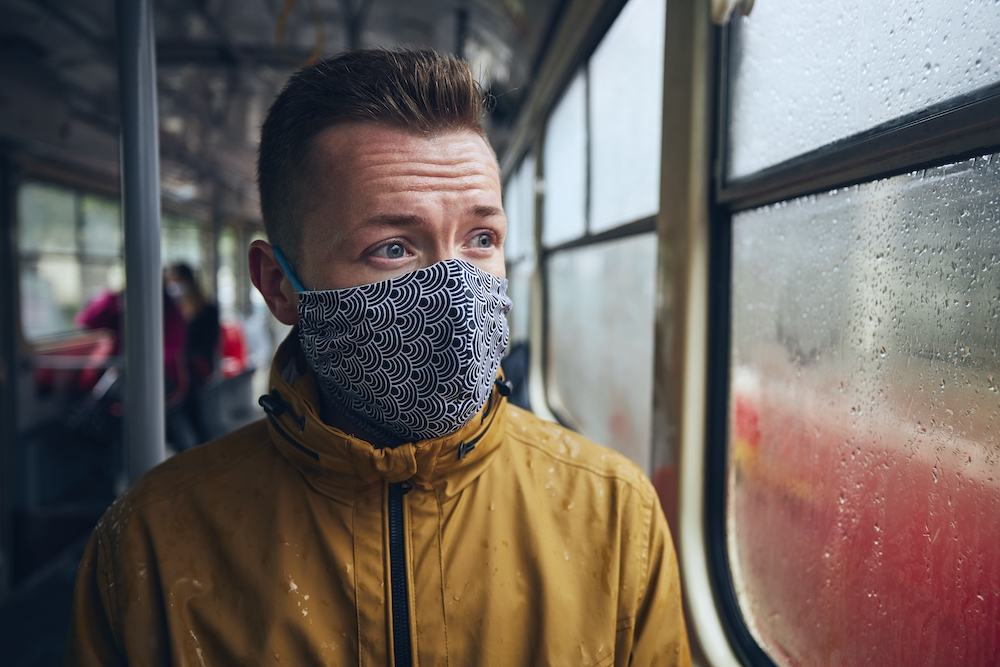

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.7226821 0.2773179]]
0
The person in the image is wearing a mask


In [30]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
